# MNIST Digit Classification with our own Framework

Lab Assignment from [AI for Beginners Curriculum](https://github.com/microsoft/ai-for-beginners).

### Reading the Dataset

This code download the dataset from the repository on the internet. You can also manually copy the dataset from `/data` directory of AI Curriculum repo.

In [1]:
!rm *.pkl
!wget -O mnist.pkl.gz https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true
!gzip -d mnist.pkl.gz

--2024-06-11 18:36:07--  https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz [following]
--2024-06-11 18:36:07--  https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mnielsen/neural-networks-and-deep-learning/master/data/mnist.pkl.gz [following]
--2024-06-11 18:36:08--  https://raw.githubusercontent.com/mnielsen/neural-networks-and-deep-learning/master/data/mnist.pkl.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Conne

In [2]:
import pickle
with open('mnist.pkl','rb') as f:
    tr_d, va_d, te_d = pickle.load(f, encoding='latin1')
    
print(tr_d[0][0][130:180])
print(tr_d[1][0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01171875 0.0703125
 0.0703125  0.0703125  0.4921875  0.53125    0.68359375 0.1015625
 0.6484375  0.99609375 0.96484375 0.49609375 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.1171875  0.140625
 0.3671875  0.6015625 ]
5


In [3]:
import numpy as np
data = tr_d[0].astype(np.float32)
labels = tr_d[1]

Let's see what is the shape of data that we have:

In [4]:
data.shape

(50000, 784)

### Splitting the Data

We will use Scikit Learn to split the data between training and test dataset:

In [5]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(data,labels,test_size=0.2)

print(f"Train samples: {len(features_train)}, test samples: {len(features_test)}")

Train samples: 40000, test samples: 10000


### Instructions

1. Take the framework code from the lesson and paste it into this notebook, or (even better) into a separate Python module
1. Define and train one-layered perceptron, observing training and validation accuracy during training
1. Try to understand if overfitting took place, and adjust layer parameters to improve accuracy
1. Repeat previous steps for 2- and 3-layered perceptrons. Try to experiment with different activation functions between layers.
1. Try to answer the following questions:
    - Does the inter-layer activation function affect network performance?
    - Do we need 2- or 3-layered network for this task?
    - Did you experience any problems training the network? Especially as the number of layers increased.
    - How do weights of the network behave during training? You may plot max abs value of weights vs. epoch to understand the relation.

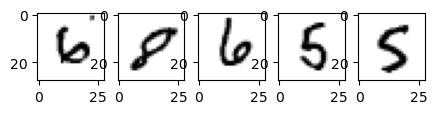

6
8
6
5
5


In [6]:
import matplotlib.pyplot as plt
def display_images(digits):
    count = len(digits)
    fig = plt.figure(figsize=(count,5))
    for i in range(count):
        ax = fig.add_subplot(1,count,i+1)
        plt.imshow(digits[i].reshape(28,28), cmap='binary')
    plt.show()

def display_labels(labels):
    for i in labels:
        print(i)

display_images(features_train[0:5])
display_labels(labels_train[0:5])

In [7]:
class Linear:
    def __init__(self,nin,nout):
        self.W = np.random.normal(0, 1.0/np.sqrt(nin), (nout, nin))
        self.b = np.zeros((1,nout))
        
    def forward(self, x):
        return np.dot(x, self.W.T) + self.b
    
net = Linear(784,10)
net.forward(features_train[0:5])

array([[ 0.11389969,  0.2582816 ,  0.07462912, -0.03340938, -0.31184777,
         0.38659753, -0.23623132, -0.28008847,  0.70699437, -0.38914427],
       [ 0.16615306,  0.07011662,  0.26079939, -0.37932941,  0.15401989,
        -0.05584373,  0.38929202, -0.07854517,  0.05579728, -0.2808518 ],
       [ 0.13261336,  0.65337197,  0.10245019,  0.07606805,  0.00253178,
         0.42519905, -0.16415129, -0.34787271,  0.52542805, -0.11950129],
       [ 0.06839056,  0.77452222, -0.28814914,  0.00671854, -0.20244466,
         0.2953632 ,  0.25925971,  0.32991361,  0.32569856,  0.05009705],
       [ 0.27490624, -0.08737728,  0.03540168, -0.26570696,  0.17013781,
        -0.07739432, -0.0573886 ,  0.03491247,  0.32924142, -0.33917098]])

In [8]:
class Softmax:
    def forward(self,z):
        zmax = z.max(axis=1,keepdims=True)
        expz = np.exp(z-zmax)
        Z = expz.sum(axis=1,keepdims=True)
        return expz / Z

softmax = Softmax()
softmax.forward(net.forward(features_train[0:5]))

array([[0.10267096, 0.11861835, 0.09871716, 0.08860783, 0.06707302,
        0.13485864, 0.07234152, 0.0692374 , 0.1857913 , 0.06208382],
       [0.11180539, 0.10156748, 0.12290432, 0.06479817, 0.11045704,
        0.08954694, 0.1397561 , 0.087537  , 0.10012346, 0.07150411],
       [0.09581731, 0.16128968, 0.09297031, 0.09054963, 0.08412988,
        0.12838442, 0.07121324, 0.05926135, 0.14191923, 0.07446496],
       [0.08719547, 0.17667008, 0.06104508, 0.08198041, 0.06650766,
        0.10941248, 0.10553277, 0.11325879, 0.11278241, 0.08561486],
       [0.12870042, 0.08958643, 0.10128951, 0.07495397, 0.11589898,
        0.09048525, 0.0923137 , 0.10123997, 0.13588685, 0.06964495]])

In [9]:
class CrossEntropyLoss:
    def forward(self,p,y):
        self.p = p
        self.y = y
        p_of_y = p[np.arange(len(y)), y]
        log_prob = np.log(p_of_y)
        return -log_prob.mean() # average over all input samples

cross_ent_loss = CrossEntropyLoss()
p = softmax.forward(net.forward(features_train[0:5]))
cross_ent_loss.forward(p,labels_train[0:5])

2.4369967132684565

In [10]:
class Linear:
    def __init__(self,nin,nout):
        self.W = np.random.normal(0, 1.0/np.sqrt(nin), (nout, nin))
        self.b = np.zeros((1,nout))
        self.dW = np.zeros_like(self.W)
        self.db = np.zeros_like(self.b)
        
    def forward(self, x):
        self.x=x
        return np.dot(x, self.W.T) + self.b
    
    def backward(self, dz):
        dx = np.dot(dz, self.W)
        dW = np.dot(dz.T, self.x)
        db = dz.sum(axis=0)
        self.dW = dW
        self.db = db
        return dx
    
    def update(self,lr):
        self.W -= lr*self.dW
        self.b -= lr*self.db
        
class Softmax:
    def forward(self,z):
        self.z = z
        zmax = z.max(axis=1,keepdims=True)
        expz = np.exp(z-zmax)
        Z = expz.sum(axis=1,keepdims=True)
        return expz / Z
    def backward(self,dp):
        p = self.forward(self.z)
        pdp = p * dp
        return pdp - p * pdp.sum(axis=1, keepdims=True)
    
class CrossEntropyLoss:
    def forward(self,p,y):
        self.p = p
        self.y = y
        p_of_y = p[np.arange(len(y)), y]
        log_prob = np.log(p_of_y)
        return -log_prob.mean()
    def backward(self,loss):
        dlog_softmax = np.zeros_like(self.p)
        dlog_softmax[np.arange(len(self.y)), self.y] -= 1.0/len(self.y)
        return dlog_softmax / self.p
    
lin = Linear(784,10)
softmax = Softmax()
cross_ent_loss = CrossEntropyLoss()

learning_rate = 0.1

pred = np.argmax(lin.forward(features_train),axis=1)
acc = (pred==labels_train).mean()
print("Initial accuracy: ",acc)

batch_size=4
for i in range(0,len(features_train),batch_size):
    xb = features_train[i:i+batch_size]
    yb = labels_train[i:i+batch_size]
    
    # forward pass
    z = lin.forward(xb)
    p = softmax.forward(z)
    loss = cross_ent_loss.forward(p,yb)
    
    # backward pass
    dp = cross_ent_loss.backward(loss)
    dz = softmax.backward(dp)
    dx = lin.backward(dz)
    lin.update(learning_rate)
    
pred = np.argmax(lin.forward(features_train),axis=1)
acc = (pred==labels_train).mean()
print("Final accuracy: ",acc)

Initial accuracy:  0.096525
Final accuracy:  0.90655


In [11]:
class Net:
    def __init__(self):
        self.layers = []
    
    def add(self,l):
        self.layers.append(l)
        
    def forward(self,x):
        for l in self.layers:
            x = l.forward(x)
        return x
    
    def backward(self,z):
        for l in self.layers[::-1]:
            z = l.backward(z)
        return z
    
    def update(self,lr):
        for l in self.layers:
            if 'update' in l.__dir__():
                l.update(lr)
                
net = Net()
net.add(Linear(784,10))
net.add(Softmax())
loss = CrossEntropyLoss()

def get_loss_acc(x,y,loss=CrossEntropyLoss()):
    p = net.forward(x)
    l = loss.forward(p,y)
    pred = np.argmax(p,axis=1)
    acc = (pred==y).mean()
    return l,acc

train_x = features_train
train_labels = labels_train
test_x = features_test
test_labels = labels_test

print("Initial loss={}, accuracy={}: ".format(*get_loss_acc(train_x,train_labels)))

def train_epoch(net, train_x, train_labels, loss=CrossEntropyLoss(), batch_size=4, lr=0.1):
    for i in range(0,len(train_x),batch_size):
        xb = train_x[i:i+batch_size]
        yb = train_labels[i:i+batch_size]

        p = net.forward(xb)
        l = loss.forward(p,yb)
        dp = loss.backward(l)
        dx = net.backward(dp)
        net.update(lr)
 
train_epoch(net,train_x,train_labels)
        
print("Final loss={}, accuracy={}: ".format(*get_loss_acc(train_x,train_labels)))
print("Test loss={}, accuracy={}: ".format(*get_loss_acc(test_x,test_labels)))

Initial loss=2.4191174793650387, accuracy=0.08325: 
Final loss=0.32681900033954825, accuracy=0.906075: 
Test loss=0.3509230442601421, accuracy=0.8992: 


<IPython.core.display.Javascript object>


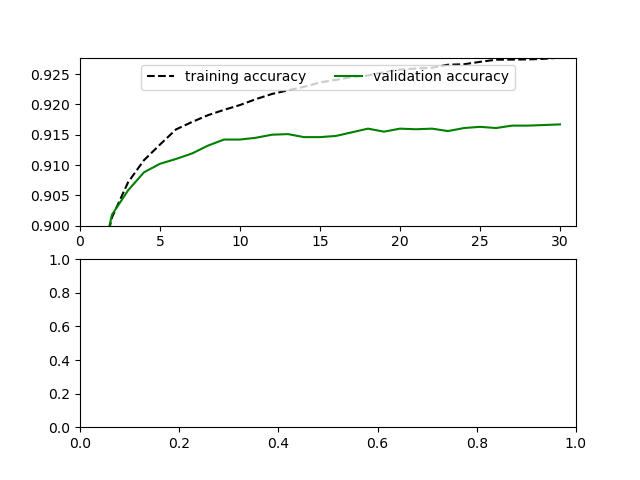

In [22]:
def train_and_plot(n_epoch, net, loss=CrossEntropyLoss(), batch_size=4, lr=0.1):
    fig, ax = plt.subplots(2, 1)
    ax[0].set_xlim(0, n_epoch + 1)
    ax[0].set_ylim(0.9,0.95)

    train_acc = np.empty((n_epoch, 3))
    train_acc[:] = np.NAN
    valid_acc = np.empty((n_epoch, 3))
    valid_acc[:] = np.NAN

    for epoch in range(1, n_epoch + 1):

        train_epoch(net,train_x,train_labels,loss,batch_size,lr)
        tloss, taccuracy = get_loss_acc(train_x,train_labels,loss)
        train_acc[epoch-1, :] = [epoch, tloss, taccuracy]
        vloss, vaccuracy = get_loss_acc(test_x,test_labels,loss)
        valid_acc[epoch-1, :] = [epoch, vloss, vaccuracy]
        
        ax[0].set_ylim(0.9, max(max(train_acc[:, 2]), max(valid_acc[:, 2])) * 1.0)

        plot_training_progress(train_acc[:, 0], (train_acc[:, 2],
                                                 valid_acc[:, 2]), fig, ax[0])
        fig.canvas.draw()
        fig.canvas.flush_events()

    return train_acc, valid_acc

def plot_training_progress(x, y_data, fig, ax):
    styles = ['k--', 'g-']
    # remove previous plot
    while ax.lines:
        ax.lines.pop()
    # draw updated lines
    for i in range(len(y_data)):
        ax.plot(x, y_data[i], styles[i])
    ax.legend(ax.lines, ['training accuracy', 'validation accuracy'],
              loc='upper center', ncol = 2)
    
%matplotlib nbagg 
net = Net()
net.add(Linear(784,10))
net.add(Softmax())

res = train_and_plot(30,net,lr=0.005)

<IPython.core.display.Javascript object>


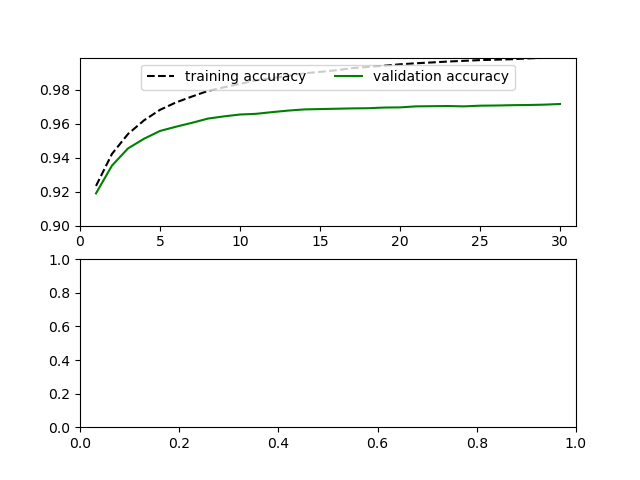

In [25]:
class Tanh:
    def forward(self,x):
        y = np.tanh(x)
        self.y = y
        return y
    def backward(self,dy):
        return (1.0-self.y**2)*dy
    
net = Net()
net.add(Linear(784,100))
net.add(Tanh())
net.add(Linear(100,10))
net.add(Softmax())
loss = CrossEntropyLoss()

res = train_and_plot(30,net,lr=0.01)

<IPython.core.display.Javascript object>


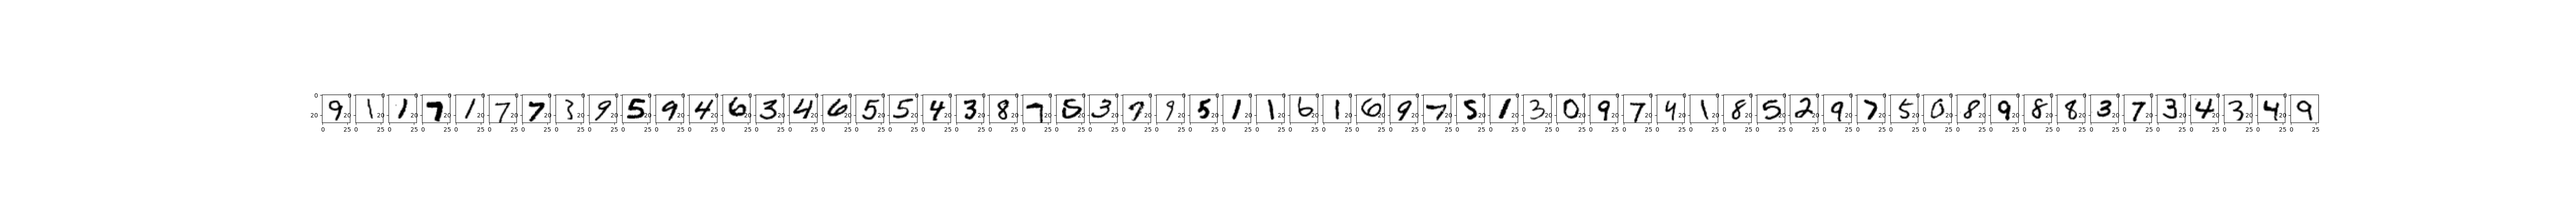

[9 1 1 7 1 7 7 3 9 5 9 4 6 3 4 6 5 5 4 3 8 7 5 3 7 9 5 1 1 6 1 6 9 7 5 1 3
 0 9 7 4 1 8 5 2 9 7 5 0 8 9 8 8 3 7 3 4 3 4 9]
[9 1 1 7 1 7 7 1 9 5 9 4 6 3 4 6 5 5 4 3 8 7 6 3 7 9 5 1 1 6 1 6 9 7 5 1 3
 0 9 7 4 1 8 5 2 9 7 5 0 8 9 8 8 3 7 3 4 3 4 9]


In [33]:
display_images(features_test[40:100])
print(labels_test[40:100])
p = net.forward(features_test[40:100])
pred = np.argmax(p,axis=1)
print(pred)

<IPython.core.display.Javascript object>


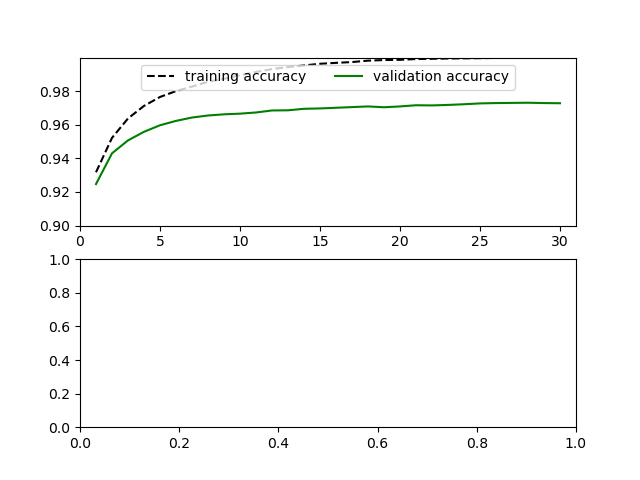

In [34]:
net = Net()
net.add(Linear(784,100))
net.add(Tanh())
net.add(Linear(100,50))
net.add(Tanh())
net.add(Linear(50,10))
net.add(Softmax())
loss = CrossEntropyLoss()

res = train_and_plot(30,net,lr=0.01)